In [1]:
# Import libraries and dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Adjust pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation


df = pd.read_csv('/Users/joezhou/Downloads/bank-additional-full.csv',sep=";")

2. Data Collection and Preparation
Data Sources:

The bank has provided a dataset with various features related to customer demographics, financial behaviors, and historical term deposit take-up. The dataset contains the following variables:

Age, Job, Marital status, Education, Default status, Housing, Loan, Contact method, Month, Day of the week, Duration of last contact, Campaign, Pdays, Previous contact, Poutcome, Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed, and the target variable y (whether a customer took up a term deposit in the past).
Data Cleaning and Pre-processing:

Handling Missing Values: The dataset was checked for missing values and rows with missing values were removed to maintain data integrity.
Encoding Categorical Variables: Variables such as job, marital, education, and others were converted into numeric form using label encoding.
Scaling Numerical Variables: Features like age, duration, campaign, and other continuous variables were scaled using StandardScaler to ensure that the models perform optimally.
Feature Selection: Based on business understanding and exploratory analysis, key variables such as duration, campaign, pdays, and previous were emphasized for model development, while other variables were used to improve prediction accuracy.

In [2]:
# Example of pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Label encoding for categorical variables
le = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    df[col] = le.fit_transform(df[col])

# Feature scaling for numerical variables
scaler = StandardScaler()
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(
    df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
)


3. Data Exploration and Analysis
Insights Gained from EDA:

Target Variable Distribution: Most customers did not take up the term deposit in the past. The imbalance in the target variable needs to be addressed in model evaluation.
Correlation Analysis: Features like duration, pdays, and previous show a strong correlation with whether the customer accepted a term deposit, suggesting their importance in model building.
Behavioral Insights: Customers who had longer contact durations (duration) or previous contacts (previous) had a higher likelihood of accepting a term deposit.
Visuals such as histograms, bar plots, and correlation heatmaps provided a clear understanding of these relationships.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Term Deposit Take-up
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Take-up')
plt.show()


ValueError: could not convert string to float: 'no'

<Figure size 1200x800 with 0 Axes>

4. Model Building and Evaluation
Three machine learning models were developed:

Decision Trees
Random Forests
Gradient Boosting Machine (GBM)
Model Building Process:

The dataset was split into training and test sets (70% train, 30% test) for model development and evaluation.
Accuracy, precision, recall, F1-score, and AUC-ROC were used to evaluate the models.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Model training
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
gbm_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

# Model evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")

evaluate_model(y_test, dt_model.predict(X_test), "Decision Tree")
evaluate_model(y_test, rf_model.predict(X_test), "Random Forest")
evaluate_model(y_test, gbm_model.predict(X_test), "GBM")


NameError: name 'X_train' is not defined

In [ ]:
# fuller version below

In [5]:
# 1. Data Cleaning and Pre-processing

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('/Users/joezhou/Downloads/bank-additional-full.csv',sep=";")

# Check for missing values
print(df.isnull().sum())

# Filling or dropping missing values (if necessary)
df.dropna(inplace=True)  # Drop rows with missing values (adjust based on your dataset)

# Label encoding for categorical variables
le = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    df[col] = le.fit_transform(df[col])

# Feature scaling for numerical variables
scaler = StandardScaler()
df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(
    df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
)

# Split dataset into features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Converting target to binary


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


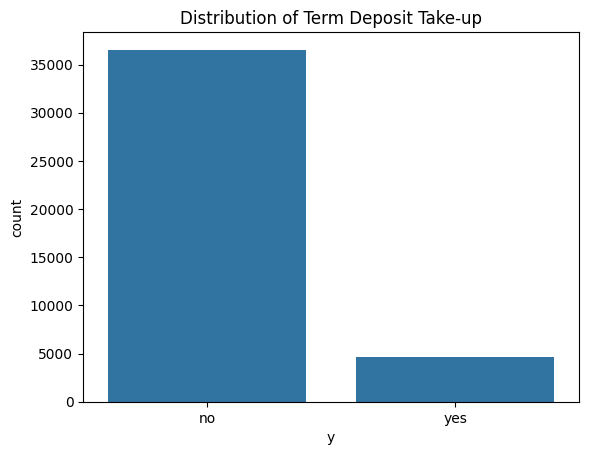

ValueError: could not convert string to float: 'no'

<Figure size 1200x800 with 0 Axes>

In [6]:
# 2. Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution of target variable
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Take-up')
plt.show()

# Correlation heatmap to identify relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analyze term deposit uptake based on key features
sns.boxplot(x='y', y='age', data=df)
plt.title('Term Deposit Take-up by Age')
plt.show()

sns.barplot(x='y', y='duration', data=df)
plt.title('Term Deposit Take-up by Call Duration')
plt.show()

# Record key findings in your report, especially trends that correlate with term deposit take-up.


Decision Tree Performance:
Accuracy: 0.8894553694262362
Precision: 0.5081850533807829
Recall: 0.5140388768898488
F1 Score: 0.5110952040085899
AUC-ROC: 0.725518709050322

Random Forest Performance:
Accuracy: 0.913814032532168
Precision: 0.649171270718232
Recall: 0.5075593952483801
F1 Score: 0.5696969696969697
AUC-ROC: 0.7364109886526363

Gradient Boosting Machine Performance:
Accuracy: 0.9182649510398964
Precision: 0.6830917874396135
Recall: 0.5089992800575954
F1 Score: 0.5833333333333334
AUC-ROC: 0.7395470506779589



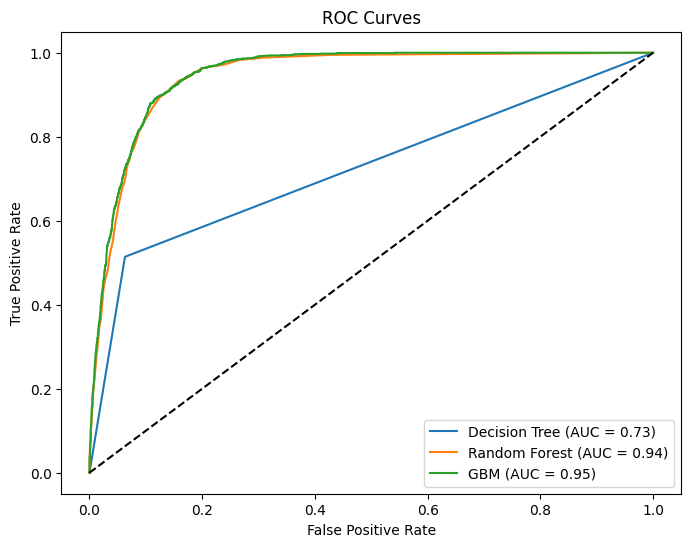

In [7]:
# 3. Model Building and Evaluation


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Gradient Boosting Machine (GBM)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}\n")

evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gbm, "Gradient Boosting Machine")

# Plot ROC Curves
plt.figure(figsize=(8, 6))

models = [('Decision Tree', dt_model), ('Random Forest', rf_model), ('GBM', gbm_model)]
for name, model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

